# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [3]:
df_male = df[df.gender=='M']
df_female=df[df.gender=='F']

print("aLL: ", df.describe())
print("male: ", df_male.describe())
print("female: ", df_female.describe())

aLL:         temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000
male:         temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000
female:         temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


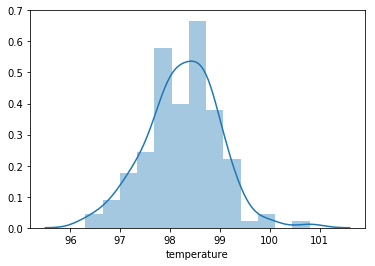

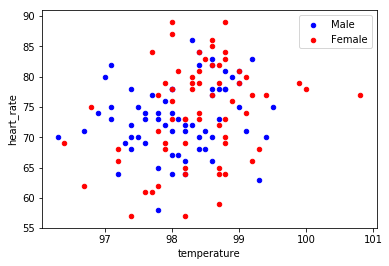

In [4]:
# create a distribution plot using seaborn
sns.distplot(df.temperature)

# create a scatterplot of male and female temperature vs heart rate in one chart
#fig, ax = plt.subplots()
ax=df_male.plot(kind='scatter', x='temperature', y='heart_rate', color='Blue', label='Male')
df_female.plot(kind='scatter', x='temperature', y='heart_rate', color='Red', label='Female',ax=ax)
plt.show()

In [5]:
import scipy.stats as stats

pval = (stats.normaltest(df['temperature']))[1]
#print(pval)
if(pval < 0.05):
    print ("Not normal distribution")
else:
    print ("Normal distribution")

#Necessary Sample Size = (Z-score)2 * StdDev*(1-StdDev) / (margin of error)2 
#if we choose 95% confidence level, then z score = 1.96 margin of error = 5%, and we choose StdDev = 0.5, 
#Nsample_size=1.96*1.96 * 0.5*0.5/(0.05)^2 =384
#if df.shape[0] >= 384:
 #   print ("Sample size is large enough")
#else:
 #   print ("Sample size is NOT large enough")

Normal distribution


In [6]:
#Q1. Is the distribution of body temperatures normal?
#Answer#: Yes, it's normally distributed.

#Q2. Is the sample size large? Are the observations independent? 
#Based on the Central Limit Theorem, the sample size > 30 is considered large. Here, we have sample size =130 >30. 
#The observations are also independent.

In [7]:
#Q3:Is the true population mean really 98.6 degrees F?
#Would you use a one-sample or two-sample test? Why?
#In this situation, is it appropriate to use the  tt  or  zz  statistic?
#Now try using the other test. How is the result be different? Why?

In [8]:
#Here, we use one-sample test, because we only have one set of data available that we will compare to single mean. 
#Also, we use t-statistic, becuase the population standard deviation is unknown.  
from scipy.stats import ttest_1samp
t_stat, p_val_t = ttest_1samp(df['temperature'], 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -5.45482329236
p value = 2.41063204156e-07


In [9]:
# conduct one-sample z-test
from statsmodels.stats.weightstats import ztest
z_stat, p_val_z = ztest(x1= df['temperature'], value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: -5.45482329236
p value = 4.9021570141e-08


In [10]:
#Because the p-value is less than 1%, we can reject the null hypthesis that the true population mean is 98.6 degrees F
#Therefore, we said that the true population mean is different than 98.6 degrees F.
#The t and values are approximately the same, because the sample size is quite large.

In [11]:
#Q4,Draw a small sample of size 10 from the data and repeat both tests.
#Which one is the correct one to use?
#What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [12]:
# generate random sample
sample = np.random.choice(df['temperature'], size=10)

In [13]:
# conduct one-sample t-test
t_stat, p_val_t = ttest_1samp(sample, 98.6)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: 0.686022018931
p value = 0.509983811254


In [14]:
# conduct one-sample z-test
z_stat, p_val_z = ztest(x1= sample, value = 98.6)

print('z-statistic:',z_stat)
print('p value =',p_val_z)

z-statistic: 0.686022018931
p value = 0.492699223452


In [15]:
#The p values for the t and z tests are significantly different. 
#The sample size is less than 30 and the population standard deviation is unknown, so the tt-statistic should be used.

In [16]:
#Q5.At what temperature should we consider someone's temperature to be "abnormal"?
#Start by computing the margin of error and confidence interval.

In [18]:
# Here, we first calculate the margin of error for sample mean with 95% confidence
print('The mean temperature of the data is', np.mean(df['temperature']))
z = 1.96 # this is the value of z for 95% confidence
margin_error = z * np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print('margin of error for a sample mean =', margin_error)

The mean temperature of the data is 98.24923076923078
margin of error for a sample mean = 0.125550964803


In [19]:
#The normal human temperatures is estimated with 95% confidence, which is 98.25 +/- 0.126, between 98.124 and 98.376 in degrees Fahrenheit.
#So, we can define the "abnormal" temperature to be outside of this range, which is greater than 98.376 or less than 98.124.

In [20]:
# Calculate 95% confidence interval
from scipy import stats
conf_int = stats.norm.interval(alpha=0.95, loc=np.mean(df['temperature']), scale=np.std(df['temperature']))
print('95% confidence interval:',conf_int)

95% confidence interval: (96.81775582674824, 99.680705711713316)


In [21]:
# If we use the 95% confidence interval, we can define an "abnormal" temperature to be 
#the temperature greater than 99.478 or less than 96.723 in degrees Fahrenheit.

In [22]:
#Q6. Is there a significant difference between males and females in normal temperature?
#What test did you use and why?
#Write a story with your conclusion in the context of the original problem.

In [23]:
#First, we get male and female temperature scores
male_temps = np.array(df.temperature[df.gender == "M"])
female_temps = np.array(df.temperature[df.gender == "F"])

In [24]:
#Since the population standard deviation is unknown, we will use the t-test
# Now, we we use two sample t-test to  compare the difference of two quantities

from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.28543453817
p value = 0.0239318831224


In [ ]:
#Based on the p-value, which is below the significance level of 0.05,the evidence is weak to accept the null Hypothesis.
#Here, the null hypothesis is that there is no difference between male and female temperatures
#Therefore, we reject the null Hypothesis, which means There is a significant difference between males and females in 
#normal temperature.